In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [45]:

import cv2
import random
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline

In [123]:
image = cv2.imread('/home/forkyknight/Downloads/13.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [124]:
def plot_images(img1, img2):
    fig = plt.figure(figsize=[20,20])
    ax1 = fig.add_subplot(121)     # one row two columns and targeting the first column
    ax1.imshow(img1)
    ax1.set(title="Normal Image")   # adding title

    ax2 = fig.add_subplot(122)    # one row two columns and targeting the second column
    ax2.imshow(img2, cmap='gray')
    ax2.set(title="Grayscale Image") 

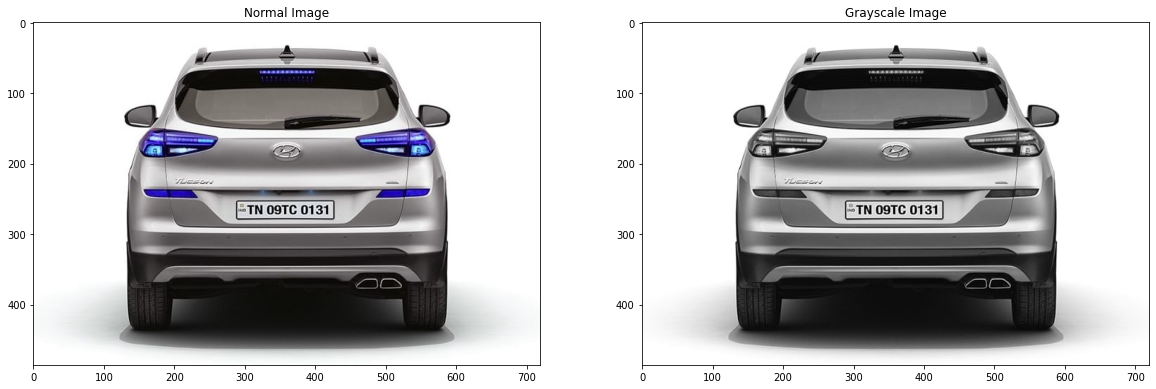

In [125]:
plot_images(image, gray)

In [126]:
blur = cv2.bilateralFilter(gray, 10, 100, 100) 

In [127]:

def plot_images(img1, img2):
    fig = plt.figure(figsize=[20,20])
    ax1 = fig.add_subplot(121)     # one row two columns and targeting the first column
    ax1.imshow(img1,cmap='gray')
    ax1.set(title="Grayscale Image")   # adding title

    ax2 = fig.add_subplot(122)    # one row two columns and targeting the second column
    ax2.imshow(img2, cmap='gray')
    ax2.set(title="Grayscale Blurred Image")

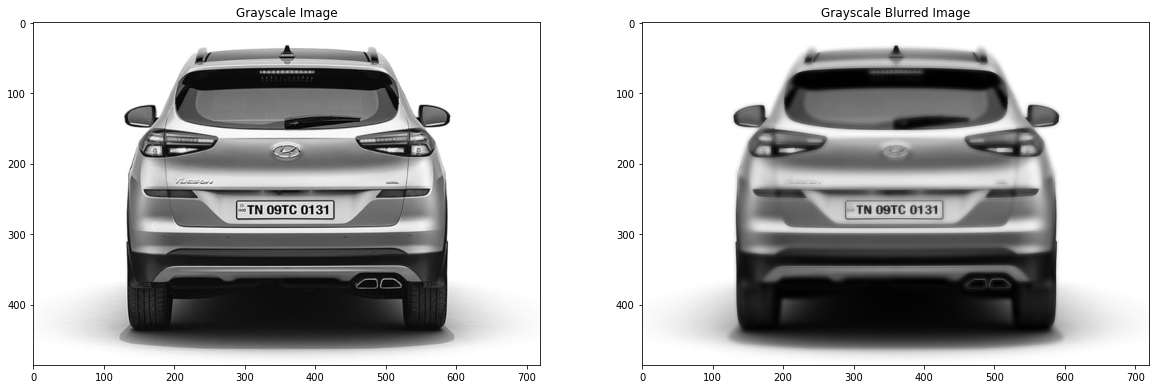

In [128]:
plot_images(gray, blur)

In [129]:
edges = cv2.Canny(blur, 15, 100)

In [130]:
def plot_images(img1, img2):
    fig = plt.figure(figsize=[20,20])
    ax1 = fig.add_subplot(121)     # one row two columns and targeting the first column
    ax1.imshow(img1,cmap='gray')
    ax1.set(title="Grayscale Blurred Image")   # adding title

    ax2 = fig.add_subplot(122)     # one row two columns and targeting the second column
    ax2.imshow(img2, cmap='gray')
    ax2.set(title="Image with Edges") 

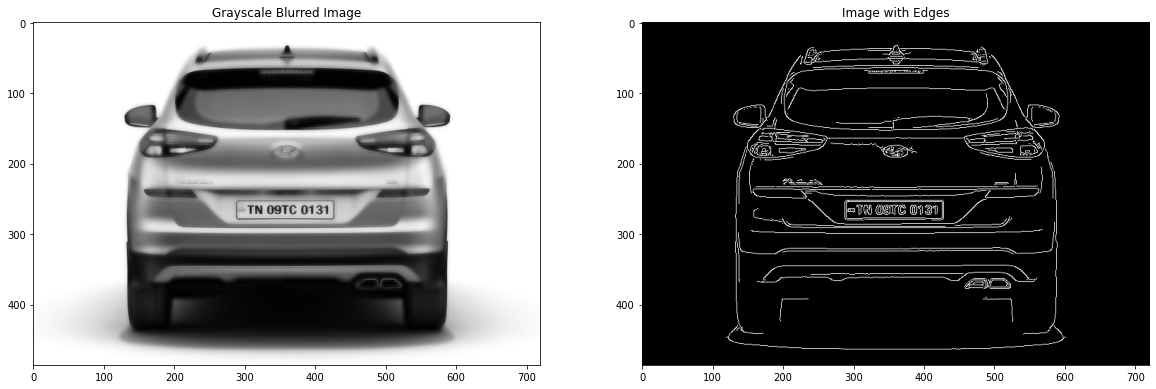

In [131]:
plot_images(blur, edges)

In [132]:
counters, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #See, there are three arguments in cv.findContours() function, first one is source image, second is contour retrieval mode, third is contour approximation method.

In [133]:
image_copy = image.copy()

In [134]:
_ = cv2.drawContours(image_copy, counters, -1, (255,0,255),2)


In [135]:
def plot_images(img1, img2):
    fig = plt.figure(figsize=[20,20])
    ax1 = fig.add_subplot(121)     # one row two columns and targeting the first column
    ax1.imshow(img1,cmap='gray')
    ax1.set(title="Grayscale Blurred Image")   # adding title

    ax2 = fig.add_subplot(122)     # one row two columns and targeting the second column
    ax2.imshow(img2, cmap='gray')
    ax2.set(title="Image with Contours")      # adding title


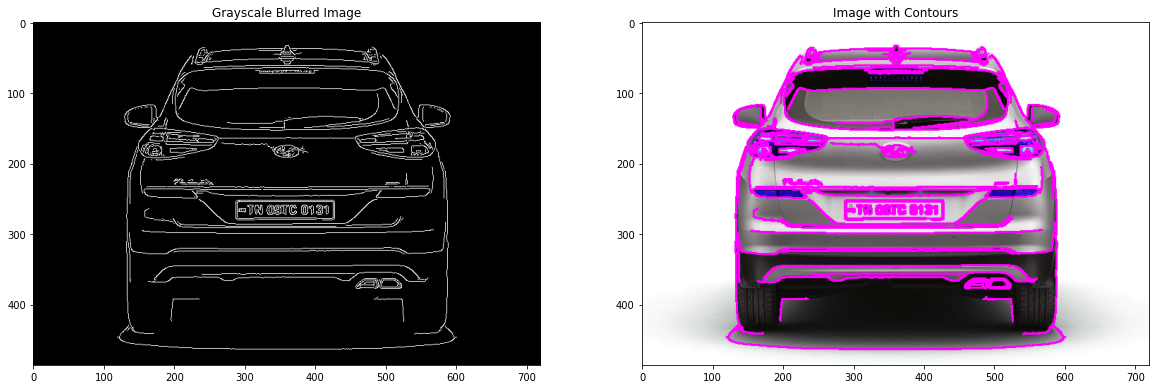

In [136]:
plot_images(edges, image_copy)

In [137]:
print(len(counters))


226


In [138]:
counters_new = sorted(counters, key=cv2.contourArea, reverse=True)[:20]


In [139]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, counters_new, -1, (255,0,255),2)

In [140]:
def plot_images(img1, img2):
    fig = plt.figure(figsize=[20,20])
    ax1 = fig.add_subplot(121)     # one row two columns and targeting the first column
    ax1.imshow(img1,cmap='gray')
    ax1.set(title="Grayscale Image")   # adding title

    ax2 = fig.add_subplot(122)     # one row two columns and targeting the second column
    ax2.imshow(img2, cmap='gray')
    ax2.set(title="Image with top 20 Contours")      # adding title

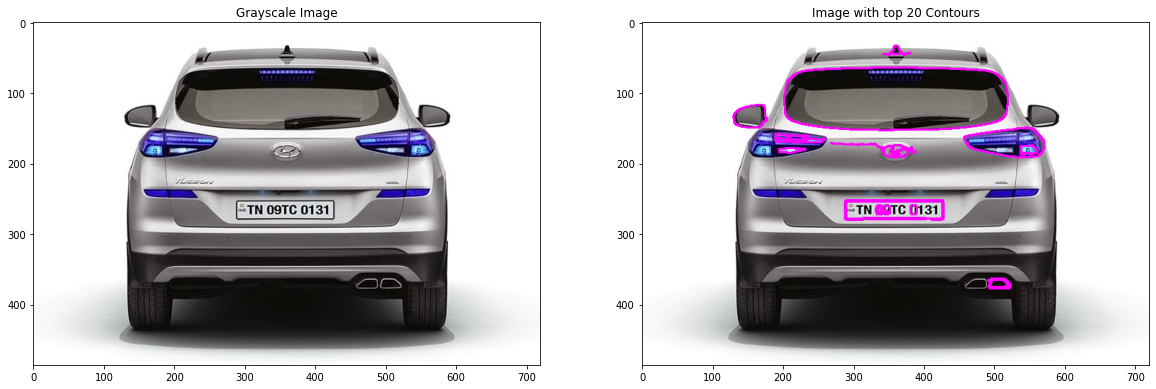

In [141]:
plot_images(image, image_copy)

In [142]:
plate = None

for counter in counters_new:
    perimeter = cv2.arcLength(counter, True)
    edges_count = cv2.approxPolyDP(counter, 0.02 * perimeter, True) # helps in counting the number of edges in an image
    if len(edges_count) == 4:
        print("in")
        x,y,w,h = cv2.boundingRect(counter)
        plate = image[y:y+h, x:x+w]
        break



in


In [143]:
type(plate)

numpy.ndarray

In [144]:
cv2.imwrite("plate.png", plate)


True

In [145]:

def plot_images(img1):
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(111)     # one row two columns and targeting the first column
    ax1.imshow(img1,cmap='gray')
    ax1.set(title="Plate Image")

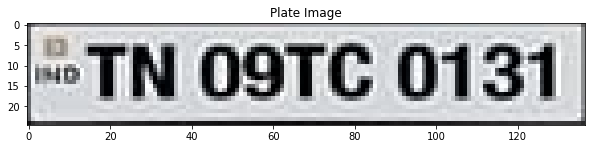

In [146]:
plot_images(plate)

In [147]:
import pytesseract

In [148]:
tessdata_dir_config = "/usr/share/tesseract-ocr/4.00/tessdata"

In [149]:
output = pytesseract.image_to_string(plate, lang='eng', config=tessdata_dir_config)


In [150]:
output

'TN O9TC 0131\n\x0c'